# Data Exploration

In this notebook, we display differents metrics and values in order to gain insight on our data.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('../data/processed/sequences.csv')
sequences = df['Sequence']
label = df['Family']

Let's see the number of sequences and families of genes

In [46]:
print('Number of sequences: {}'.format(len(sequences)))
print('Number of families: {}'.format(len(set(label))))

Number of sequences: 1155
Number of families: 50


In [47]:
print(df.head())

   Family  Gene  Species                                           Sequence
0       6    30        9  GKLPTQRFSKNYHAFWTSKVKEDGYPLWSSSVRGIRDSGWVEWIVI...
1       6    31        9  GKLPTQRFSKNYHAFWTSKVKEDGYPLWSSSVSGIRDSGWVEWIVI...
2       6    12        9  AQLPIQLMFAKNYQAFGTSKRKEDGYPVWSSAGGIRESVVVEWSKV...
3       6    22       16  GMLPTEMFMKNDHGFATSKGMEDGYPCWSSTGGIRDSRWVDWNDVR...
4       6    23       17  GLLPTQMFIKNYHGFATSKGKEDGYPLWSSAAGIRDSVWADWNEVR...


In [48]:
# Display the distribution of the number of sequences per family
print('Distribution of the number of sequences per family:')
print(df.groupby('Family').count()['Sequence'].describe())



Distribution of the number of sequences per family:
count    50.000000
mean     23.100000
std      11.436158
min       8.000000
25%      14.000000
50%      20.000000
75%      28.750000
max      65.000000
Name: Sequence, dtype: float64


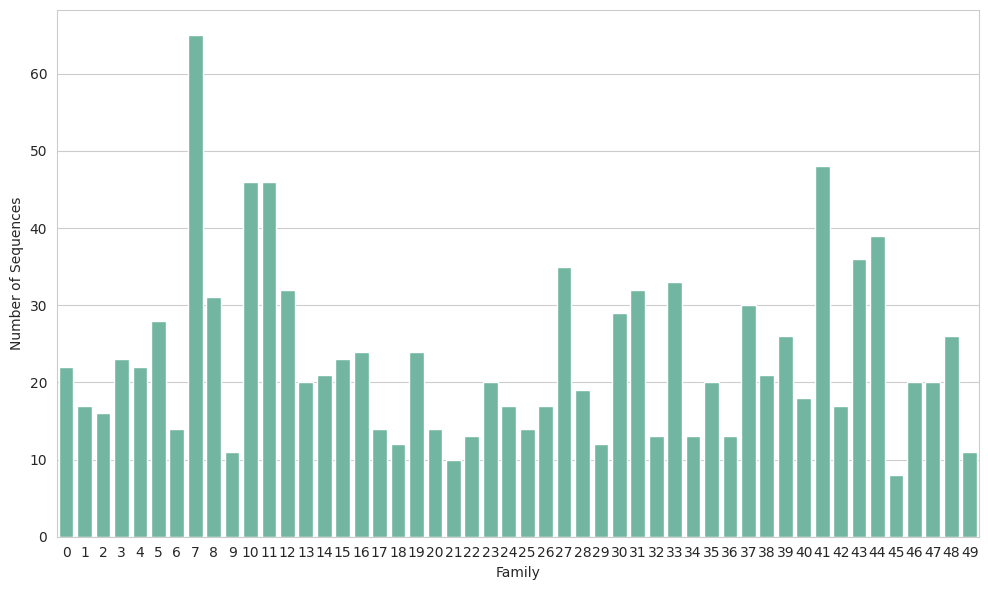

In [49]:
# Display the distribution of the families
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.figure(figsize=(10, 6))
sns.countplot(x='Family', data=df)
plt.xlabel('Family')
plt.ylabel('Number of Sequences')
plt.tight_layout()
plt.show()

In [51]:
# Display the distribution of the length of the sequences
print('Distribution of the length of the sequences:')
print(df['Sequence'].apply(len).describe())


Distribution of the length of the sequences:
count    1155.000000
mean      577.707359
std       531.720248
min        36.000000
25%       487.000000
50%       502.000000
75%       526.000000
max      8363.000000
Name: Sequence, dtype: float64


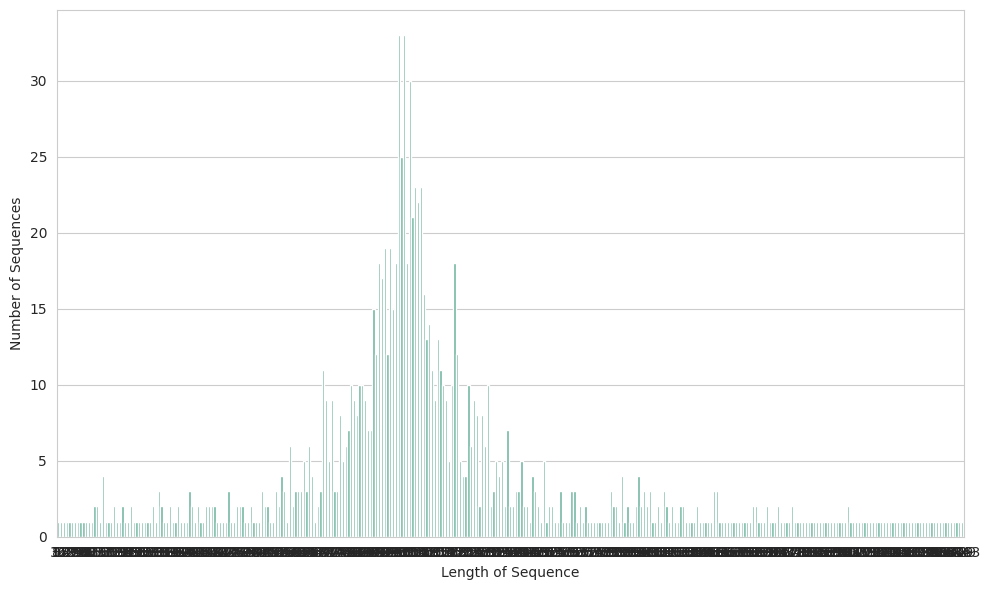

In [55]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Sequence'].apply(len))
plt.xlabel('Length of Sequence')
plt.ylabel('Number of Sequences')
plt.tight_layout()
plt.show()

After computing the similarity matrix from the alignment of sequences dones with blosum substitution matrix :
- do `make blosum` in the terminal

We can now display the similarity matrix


In [50]:
# load the similarity matrix made with Blosum62
similarity_matrix = np.load('../data/processed/similarity_matrix.npy')

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/similarity_matrix.npy'

In [29]:
# Display the similarity matrix information
print('Similarity matrix shape: {}'.format(similarity_matrix.shape))
print('Minimum similarity: {}'.format(similarity_matrix.min()))
print('Maximum similarity: {}'.format(similarity_matrix.max()))
print('Average similarity: {}'.format(similarity_matrix.mean()))
print('Median similarity: {}'.format(np.median(similarity_matrix)))

Similarity matrix shape: (980, 980)
Minimum similarity: 0.0
Maximum similarity: 9046.0
Average similarity: 418.221576426489
Median similarity: 408.0


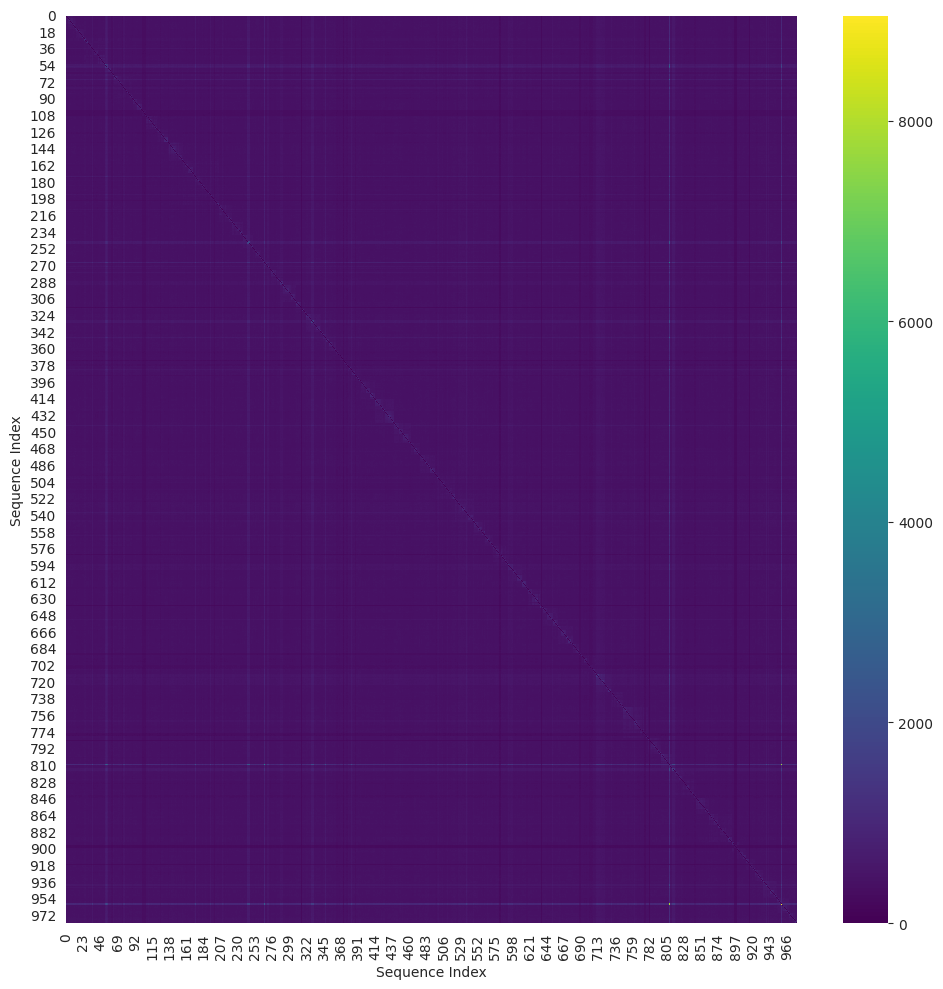

In [30]:
# Heatmap of the similarity matrix
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, cmap='viridis')
plt.xlabel('Sequence Index')
plt.ylabel('Sequence Index')
plt.tight_layout()
plt.show()


/tmp/ipykernel_60349/1147474857.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(similarity_matrix.flatten(), bins=100)


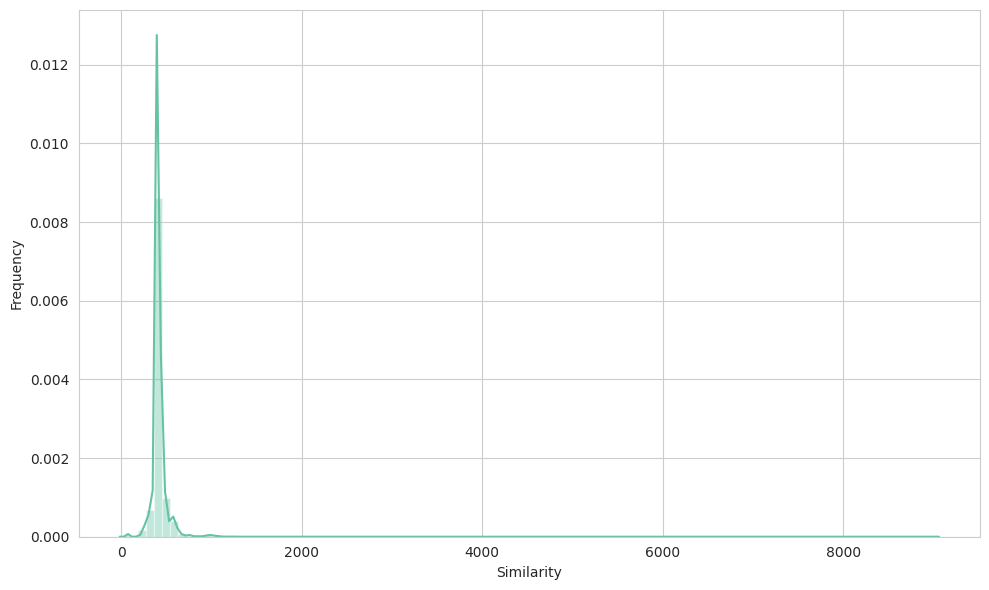

In [31]:
# Display the distribution of the similarity matrix
plt.figure(figsize=(10, 6))
sns.distplot(similarity_matrix.flatten(), bins=100)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [32]:
# Modify every value > 1000 to 1000
similarity_matrix = np.where(similarity_matrix > 700,700, similarity_matrix)
# Modify every value < 200 to 0
similarity_matrix = np.where(similarity_matrix < 300,0, similarity_matrix)


/tmp/ipykernel_60349/1147474857.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(similarity_matrix.flatten(), bins=100)


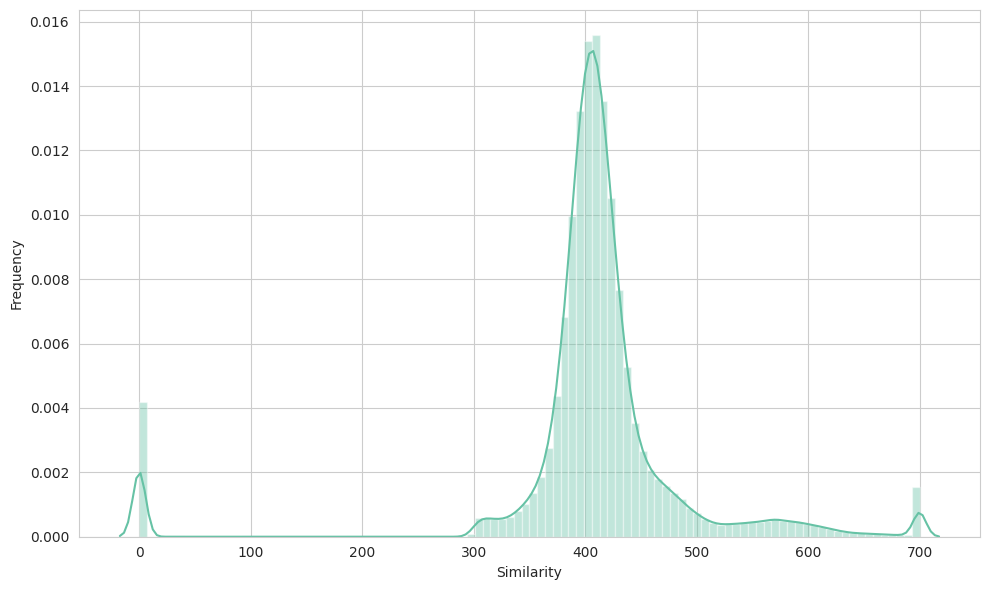

In [33]:
# Display the distribution of the similarity matrix
plt.figure(figsize=(10, 6))
sns.distplot(similarity_matrix.flatten(), bins=100)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

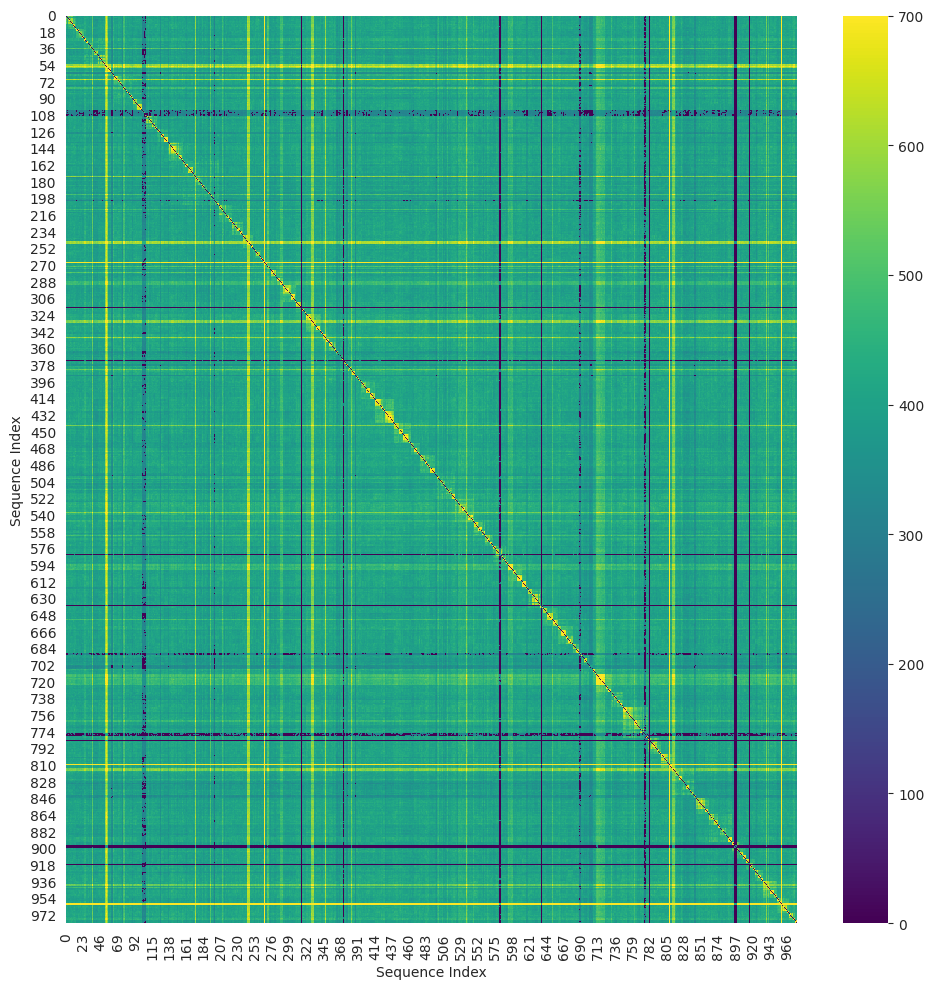

In [34]:
#Display new heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, cmap='viridis')
plt.xlabel('Sequence Index')
plt.ylabel('Sequence Index')
plt.tight_layout()
plt.show()

In [35]:
# Make the similarity matrix stochastic
stochastic_matrix = similarity_matrix / similarity_matrix.sum(axis=1, keepdims=True)

# Check nan values
print('Number of nan values: {}'.format(np.isnan(stochastic_matrix).sum()))

Number of nan values: 980


/tmp/ipykernel_60349/823028415.py:2: RuntimeWarning: invalid value encountered in divide
  stochastic_matrix = similarity_matrix / similarity_matrix.sum(axis=1, keepdims=True)


In [36]:
# Remplace nan values with a 0
stochastic_matrix = np.nan_to_num(stochastic_matrix)

/tmp/ipykernel_60349/2290892580.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stochastic_matrix.flatten(), bins=100)


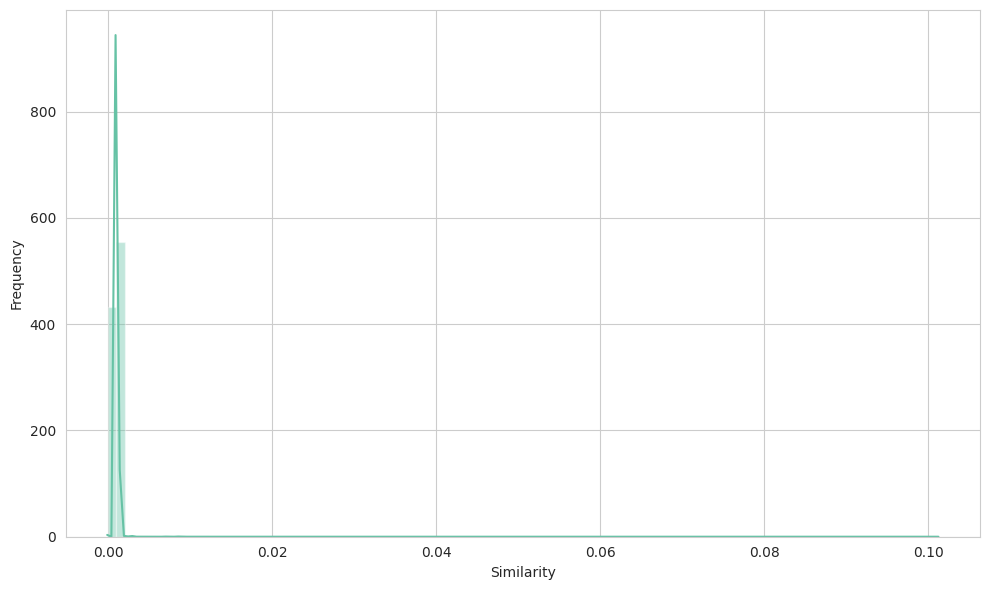

In [37]:
# Distribution of the stochastic matrix
plt.figure(figsize=(10, 6))
sns.distplot(stochastic_matrix.flatten(), bins=100)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [38]:
# Make the stochastic matrix symmetric
stochastic_matrix = (stochastic_matrix + stochastic_matrix.T) / 2

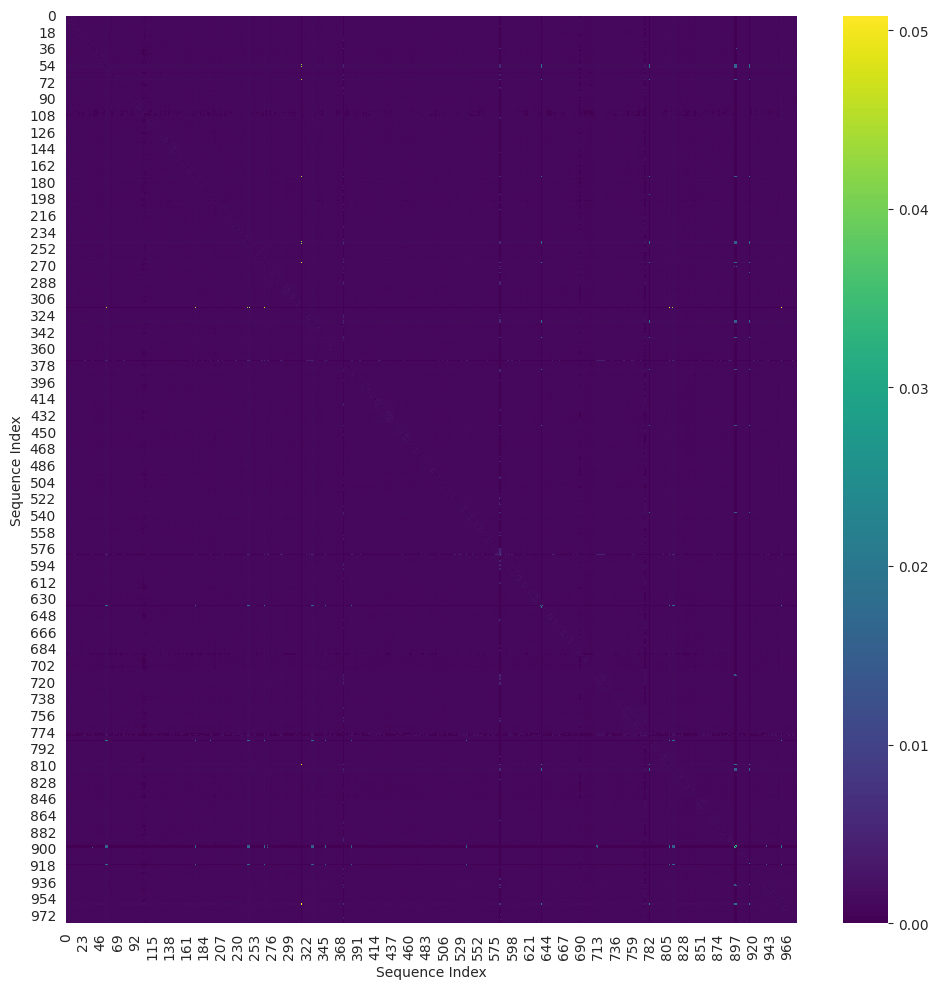

In [39]:
# Display the stochastic matrix
plt.figure(figsize=(10, 10))
sns.heatmap(stochastic_matrix, cmap='viridis')
plt.xlabel('Sequence Index')
plt.ylabel('Sequence Index')
plt.tight_layout()
plt.show()

In [40]:
# Try a mcl clustering
import networkx as nx
import markov_clustering as mc


# Run MCL with default parameters
result = mc.run_mcl(stochastic_matrix, inflation=1.001)         

# Get clusters
clusters = mc.get_clusters(result)

# Get cluster sizes
print('Number of clusters found: {}'.format(len(clusters)))
print('Cluster sizes: {}'.format([len(c) for c in clusters]))


Number of clusters found: 173
Cluster sizes: [8, 1, 666, 629, 625, 621, 609, 603, 599, 2, 3, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 6, 1, 1, 1, 5, 2, 2, 1, 1, 1, 3, 2, 7, 6, 1, 2, 3, 2, 1, 2, 3, 6, 4, 5, 4, 2, 1, 2, 3, 2, 2, 3, 4, 2, 1, 3, 2, 1, 2, 6, 5, 4, 2, 5, 3, 2, 2, 5, 2, 2, 2, 2, 1, 1, 4, 10, 6, 2, 6, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 4, 2, 5, 7, 6, 4, 13, 5, 2, 3, 2, 2, 3, 7, 1, 1, 2, 2, 2, 2, 3, 2, 4, 2, 2, 3, 1, 4, 1, 6, 6, 6, 5, 6, 2, 1, 1, 1, 1, 2, 3, 3, 1, 2, 1, 3, 1, 3, 3, 4, 2, 3, 5, 2, 2, 2, 3, 9, 5, 2, 3, 4, 3, 2, 1, 1, 3, 7, 3, 1, 3, 1, 2, 1, 4, 4, 3]


/tmp/ipykernel_60349/3808885021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([len(c) for c in clusters], bins=100)


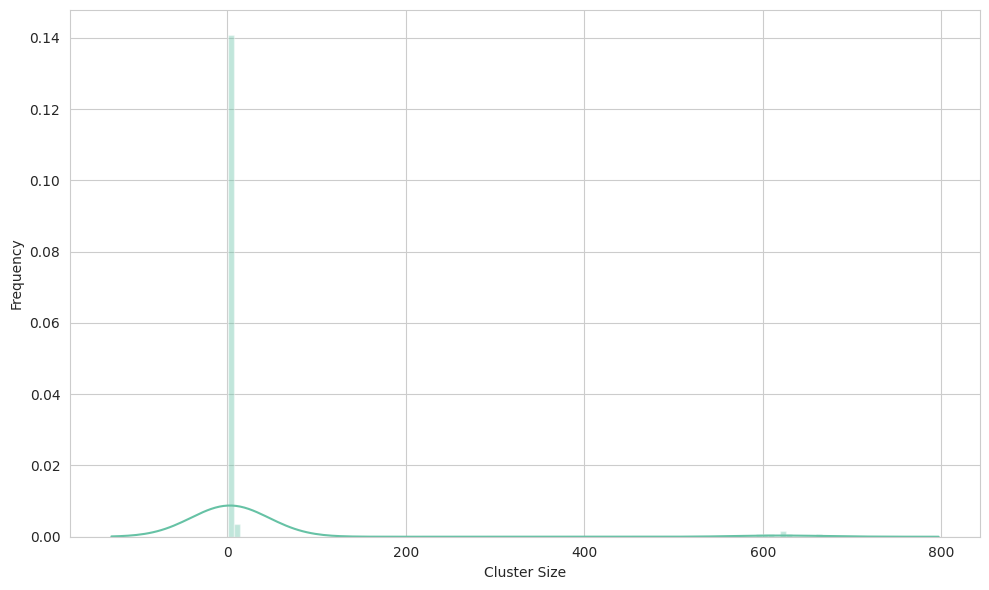

In [41]:
# Display the distribution of the cluster sizes
plt.figure(figsize=(10, 6))
sns.distplot([len(c) for c in clusters], bins=100)
plt.xlabel('Cluster Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [42]:
print(type(result))
print(result.dtype)
print(result.shape)
for row in result:
    print(row.sum())

result = result + 0.0001

<class 'numpy.ndarray'>
float64
(980, 980)
0.9892556144009046
0.8370371693504615
1.0
1.0538433907837585
1.0484724749186891
1.053080961332819
1.0056065393219757
0.9672136723914547
1.0454901774999372
0.0
0.0
0.0
1.0009688272411599
0.9990311727588401
1.0079891781212575
1.0053207314834407
0.9866900903953013
0.33979363820650405
0.4003369743363184
0.9935249085472545
1.0064750914527456
1.009164849004764
0.0
0.0
0.0
0.0
0.0
0.9995637465541038
1.001694069527895
0.998742183918001
0.9825794164761441
1.0
0.975396425190894
1.0089651082930375
1.024603574809106
2.7024390958623954
0.0
0.9846076747970259
0.0
0.0
1.0
0.0
0.0
1.0347930488335968
0.9773199757821289
1.0
0.9107379760904469
1.0205479733522513
1.0
1.0
1.027138386596168
1.0294626393454085
11.505954571157675
9.328958480285785
11.7162412401387
9.468334449993442
9.326206609876067
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0196322616764204
1.0294481097752581
1.0220036883295152
11.60510141391985
0.9484343049076817
0.9429114727676468
0.8061397644408673
0.9969

In [43]:
# Evaluate the clusters
q = mc.modularity(matrix=result, clusters=clusters)

TypeError: 'float' object is not iterable

In [ ]:
## spectral clustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Create a spectral clustering model
model = SpectralClustering(n_clusters=50, affinity='precomputed')

# Fit and predict
labels = model.fit_predict(stochastic_matrix)

# Get the silhouette score
print('Silhouette score: {:.3f}'.format(silhouette_score(stochastic_matrix, labels, metric='cosine')))


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette score: -0.310


In [ ]:
# Display graph
G = nx.from_numpy_matrix(stochastic_matrix)
nx.draw(G, with_labels=True)
plt.show()

AttributeError: module 'networkx' has no attribute 'from_numpy_matrix'

In [ ]:
model = SpectralClustering(n_clusters=50, affinity='rbf')

# Fit and predict
labels = model.fit_predict(similarity_matrix)

# Get the silhouette score
print('Silhouette score: {:.3f}'.format(silhouette_score(similarity_matrix, labels, metric='cosine')))

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_spectral.py:688: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette score: -0.704
